# Plotting fundamentals

This document will go through various way of plotting simple things. Will plot bar and line chart in matplotlib, seaborn and pandas.

## Table of content
- [OOP way - Matplotlib](#oop-way--matplotlib)
    - [bar](#bar-matplotlib-oop)
    - [line](#line-matplotlib-oop)
- [OOP way - Seaborn](#oop-way--seaborn)
    - [bar](#bar-seaborn-oop)
    - [line](#line-seaborn-line)
- [Matplotlib (normal way)](#matplotlib-normal-way)
    - [bar](#bar-matplotlib-normal)
    - [line](#line-matplotlib-normal)
- [Matplotlib (OOP way)](#matplotlib-oop-way)
    - [bar](#bar-matplotlib-oop)
    - [line](#line-matplotlib-oop)
- [Seaborn](#seaborn)
    - [bar](#bar-seaborn)
    - [line](#line-seaborn)
- [Pandas](#pandas-plt)
    - [bar](#bar-pandas)
    - [line](#line-pandas)

## Data
Using olympics data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("data/athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

### OOP way -Matplotlib

#### bar (matplotlib oop)

/var/folders/sn/cdy7qtbn06q8k7qv0vsnn1v80000gp/T/ipykernel_42386/2526765333.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Rhythmic Gymnastics'),
 Text(1, 0, 'Swimming'),
 Text(2, 0, 'Synchronized Swimming'),
 Text(3, 0, 'Figure Skating'),
 Text(4, 0, 'Diving'),
 Text(5, 0, 'Gymnastics'),
 Text(6, 0, 'Alpine Skiing'),
 Text(7, 0, 'Football'),
 Text(8, 0, 'Ski Jumping'),
 Text(9, 0, 'Short Track Speed Skating')]

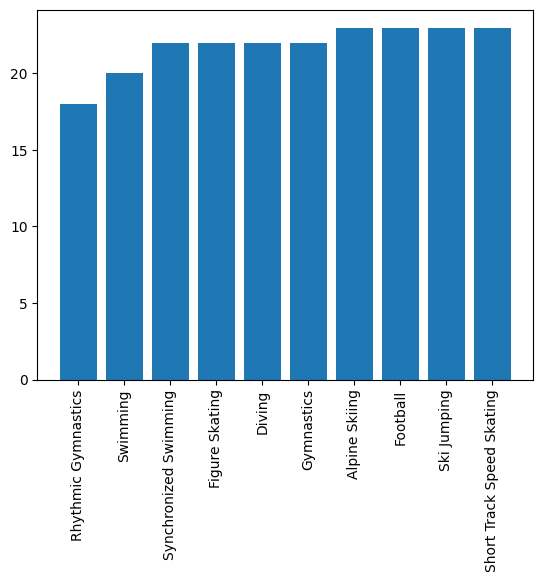

In [146]:
#10 youngest median athlete by sport
df_age = df.groupby("Sport")["Age"].median().sort_values().iloc[:10].reset_index()
x = df_age["Sport"]
height = df_age["Age"]
fig, ax = plt.subplots(1)
ax.bar(x=x, height=height)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### line (matplotlib oop)

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Weight'),
 Text(0.5, 1.0, 'Heaviest athlete by year')]

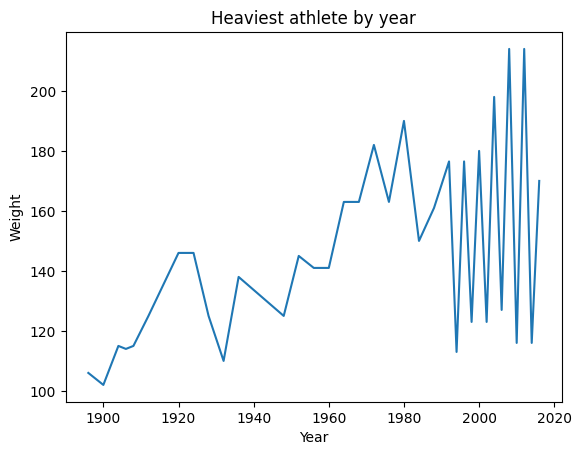

In [149]:
#reusing heaviest athlete by year to show this graph
df_height_year = df.groupby(df["Year"])["Weight"].max().reset_index().sort_values("Year")

fig, ax = plt.subplots(1)
ax.plot(df_height_year["Year"], df_height_year["Weight"])
ax.set(xlabel="Year", ylabel="Weight", title="Heaviest athlete by year")

### OOP way -Seaborn

#### bar (seaborn oop)

/var/folders/sn/cdy7qtbn06q8k7qv0vsnn1v80000gp/T/ipykernel_42386/566926743.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Rhythmic Gymnastics'),
 Text(1, 0, 'Swimming'),
 Text(2, 0, 'Synchronized Swimming'),
 Text(3, 0, 'Figure Skating'),
 Text(4, 0, 'Diving'),
 Text(5, 0, 'Gymnastics'),
 Text(6, 0, 'Alpine Skiing'),
 Text(7, 0, 'Football'),
 Text(8, 0, 'Ski Jumping'),
 Text(9, 0, 'Short Track Speed Skating')]

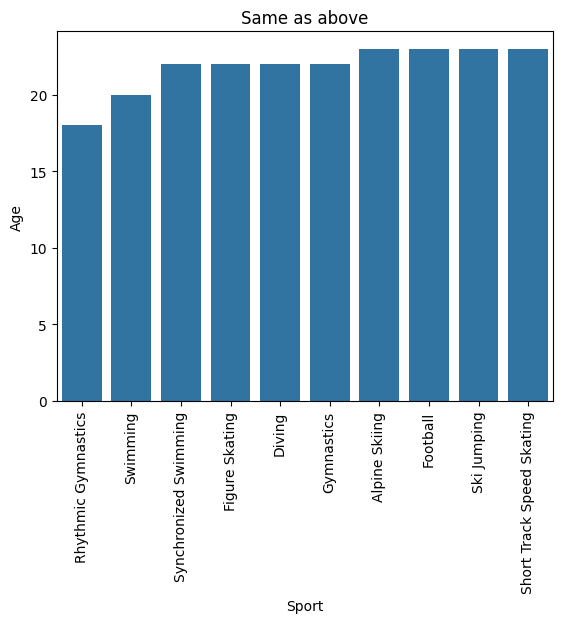

In [152]:
#reusing 10 youngest median athlete by sport for this plot
df_age = df.groupby("Sport")["Age"].median().sort_values().iloc[:10].reset_index()

ax = sns.barplot(df_age, x="Sport", y="Age")
ax.set(title= 'Same as above')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### line (seaborn oop)

[Text(0.5, 1.0, 'Weight again')]

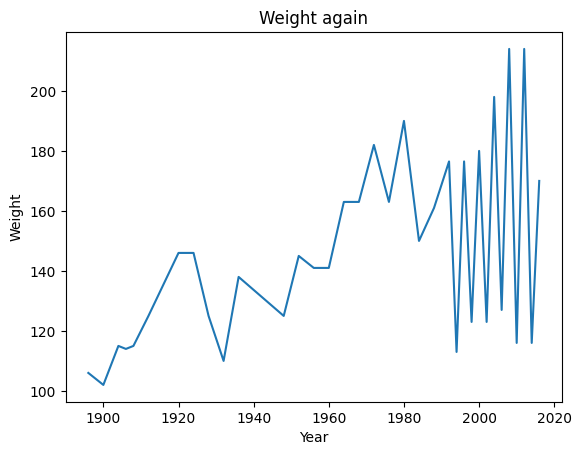

In [159]:
#reusing heaviest athlete by year to show this graph
df_height_year = df.groupby(df["Year"])["Weight"].max().reset_index().sort_values("Year")

ax = sns.lineplot(data=df_height_year, x="Year", y= "Weight")
ax.set(title= 'Weight again')

### Matplotlib (normal way)

#### bar (matplotlib normal)

Text(0.5, 1.0, 'Heaviest athletes by sport')

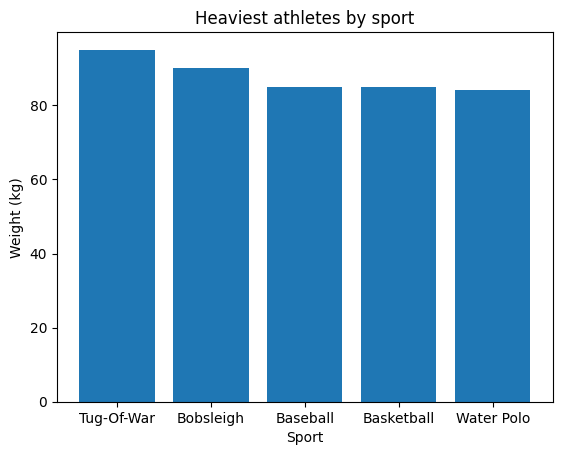

In [30]:
#Median weight by sport
df_weight = df.groupby("Sport")["Weight"].median().sort_values(ascending=False).iloc[:5].reset_index()
plt.bar(x=df_weight["Sport"], height=df_weight["Weight"])
plt.xlabel("Sport")
plt.ylabel("Weight (kg)")
plt.title("Heaviest athletes by sport")

#### line (matplotlib normal)

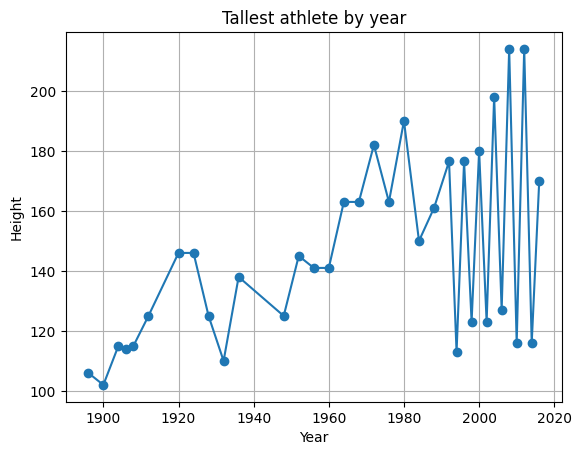

In [52]:
#heaviest athlete by year
df_height_year = df.groupby(df["Year"])["Weight"].max().reset_index().sort_values("Year")
plt.plot(df_height_year["Year"], df_height_year["Weight"], marker= "o")
plt.xlabel("Year")
plt.ylabel("Height")
plt.title('Tallest athlete by year')
plt.grid(True)

### Seaborn
Nice way to plot dataframes. This is quite high abstraction level. Matplotlib would give more details to adjust.

#### bar (seaborn)

[Text(0.5, 1.0, 'Top 5 countries with most medals')]

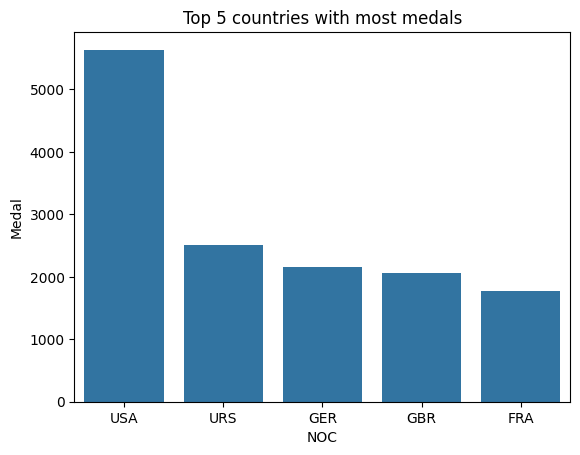

In [19]:
#plotting top 5 countries with most medals
top5_countires = df.groupby("NOC")["Medal"].count().sort_values(ascending=False).iloc[:5].reset_index()
sns.barplot(data = top5_countires, x="NOC", y="Medal").set(title="Top 5 countries with most medals")

#### line (seaborn)

[Text(0.5, 1.0, 'Tallest athlete by year, women only')]

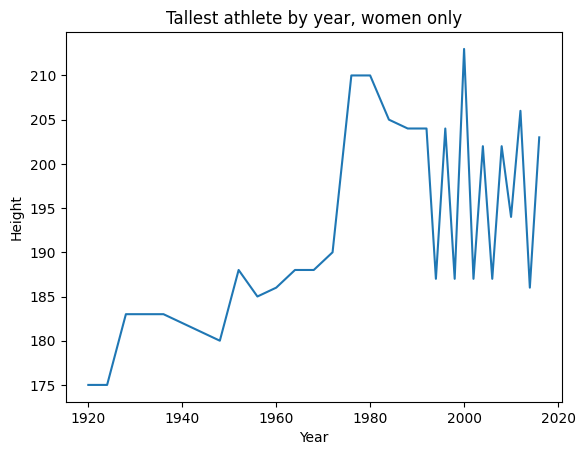

In [67]:
#reusing height by year nd filter by women only to plot with seaborn
filtered_df = df[df["Sex"] == "F"] 
df_height_year_female = filtered_df.groupby("Year")["Height"].max().reset_index().sort_values("Year")
sns.lineplot(data=df_height_year_female, x= "Year", y="Height").set(title="Tallest athlete by year, women only")

### Pandas plot

#### bar (pandas)

<Axes: title={'center': 'Number of Olympics per Season'}, xlabel='[Winter, Summer]', ylabel='Count'>

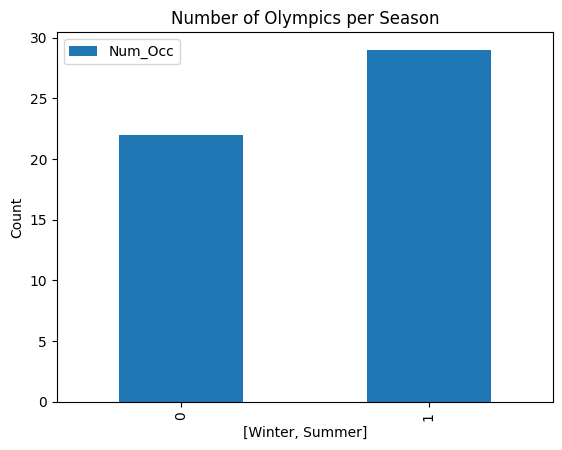

In [86]:
#count number of olympics in summer vs winter
#ony know how to do this in sql. Therefore using duckdb
import duckdb
num_occ = duckdb.query("""
    SELECT Season, COUNT(DISTINCT Year) as Num_Occ FROM df GROUP BY Season;
""").df()
num_occ.plot(kind="bar", title="Number of Olympics per Season", xlabel=num_occ["Season"], ylabel="Count")

#### line (pandas)

<Axes: xlabel='Year'>

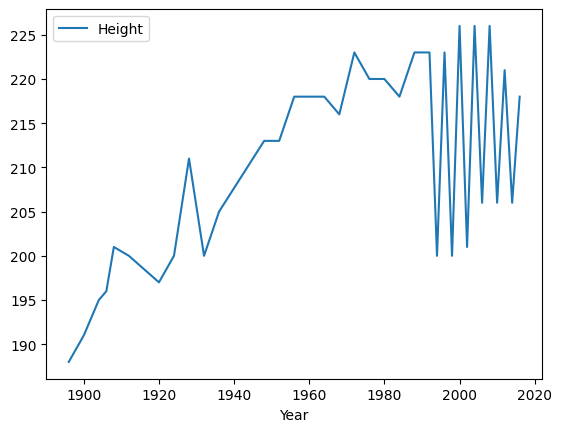

In [89]:
#reusing height by year and filter by men only to plot with pandas
filtered_df = df[df["Sex"] == "M"]
df_height_year_male = filtered_df.groupby("Year")["Height"].max().reset_index().sort_values("Year")
df_height_year_male.plot(kind="line", x="Year")